In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score , precision_score , recall_score , roc_auc_score , f1_score , confusion_matrix , roc_curve , precision_recall_curve

# 경사하강법이란
 - 손실을 줄이는 알고리즘
 - 기울기가 최소가 되는 점을 찾아서 일맞은 가중치를 찾아내는 것
 - 손실함수를 최적화하는 방법 중 하나
 
## 점진적인 학습 또는 온라인 학습
 - 머신러닝 모델을 학습하는 방법
 - 머신러닝으로 학습할 데이터가 한번에 만들어지지 않을 때 , 지속적으로 새로운 데이터가 생성될 때
 - 에포크(epoch) : 훈련 세트를 한번 모두 사용하는 과정
 - 미니배치 경사 하강 : 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식
 - 배치 사이즈 : 한번에 학습되는 데이터의 양
 - 확률적 경사하강법 : 1개씩 꺼내서 학습
 - 미니배치 경사하강법 : 여러 개씩 꺼내서 학습
 - 배치 경사하강법 : 모두 꺼내서 학습
 
## 손실함수
 - 실제값과 예측값의 차이
 - 비용함수 : Cost Function

In [13]:
fish = pd.read_csv('fish.csv')

In [12]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [14]:
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [15]:
fish_input = fish.iloc[:,1:].to_numpy()
fish_target = fish.iloc[:,0].to_numpy()

In [16]:
fish_input.shape , fish_target.shape

((159, 5), (159,))

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
train_input , test_input , train_target , test_target = train_test_split(fish_input , fish_target , random_state = 42)

In [27]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# SGDClassifier
 - 확률적 경사하강법을 제공하는 클래스
 - 에포크에 따라 과적합이 될 수 있다.
 - loss : 손실함수의 종류를 지정
  - 이진분류회귀 : 이진크로스엔트로피
  - 다중분류회귀 : 크로스엔트로피 , 소프트맥스
 - max_iter : 반복할 에포크 횟수

In [56]:
from sklearn.linear_model import SGDClassifier
# log_loss : 로지스틱 손실 함수
sc = SGDClassifier(loss = 'log_loss' , max_iter = 10 , random_state = 42)
sc.fit(train_scaled , train_target)
print(sc.score(train_scaled , train_target))
print(sc.score(test_scaled , test_target))

0.773109243697479
0.775


In [159]:
#병렬학습 partial_fit
sc.partial_fit(train_scaled , train_target)
print(sc.score(train_scaled , train_target))
print(sc.score(test_scaled , test_target))

0.9495798319327731
0.925


In [183]:
from sklearn.linear_model import SGDClassifier
# log_loss : 로지스틱 손실 함수
sc = SGDClassifier(loss = 'log_loss' , max_iter = 100, random_state = 42)
sc.fit(train_scaled , train_target)
print(sc.score(train_scaled , train_target))
print(sc.score(test_scaled , test_target))

0.8403361344537815
0.8


In [166]:
train = []
test = []
sc = SGDClassifier(loss = 'log_loss' , random_state = 42)

#partial_fit()만 사용하려면 훈련 세트의 전체 클래스의 레이블이 전달
classes = np.unique(train_target)

In [167]:
for _ in range(0,300):
    sc.partial_fit(train_scaled , train_target , classes = classes)
    train.append(sc.score(train_scaled , train_target))
    test.append(sc.score(test_scaled , test_target))

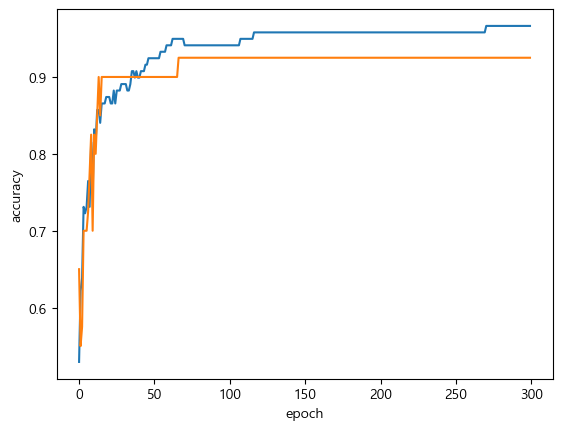

In [168]:
plt.plot(train)
plt.plot(test)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [184]:
#tol : 향상될 최소값을 지정하는 매개변수 , None : 자동(무조건 반복)
sc = SGDClassifier(loss = 'log_loss' , max_iter = 100, tol = None , random_state = 42)
sc.fit(train_scaled , train_target)
print(sc.score(train_scaled , train_target))
print(sc.score(test_scaled , test_target))

0.957983193277311
0.925
